### Script-wind speed and direction plot by Ekwacu Samuel

In [4]:
# Import existing code modules
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [7]:
#uploaded.keys()
#home_dir = 'D:/Folder_2023/Research/' ## read in the data
#data_dir ='Africa_Research/sst/ERA5_WIND/'
ds1 = xr.open_dataset('D:/Folder_2023/Research/Africa_Research/sst/ERA5_WIND/ERA5_wind_850hpa_active_inactive_diff.nc')  ##input file
ds1.data_vars

Data variables:
    time_bnds  (time, nb2) datetime64[ns] ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...

In [8]:
#Make an average of the wind variables
#For SON
wspd_son = np.mean(np.sqrt(np.add(np.square(ds1.u),np.square(ds1.v))),axis=0)
u_son = np.mean(ds1.u,axis=0)
v_son = np.mean(ds1.v,axis=0)

In [4]:
#setting up the quiver arguments (these display the wind vectors on the plot)
xx_son = wspd_son.longitude.values
yy_son = wspd_son.latitude.values
X_son,Y_son =np.meshgrid(xx_son, yy_son)
U_son = u_son.data
V_son = v_son.data

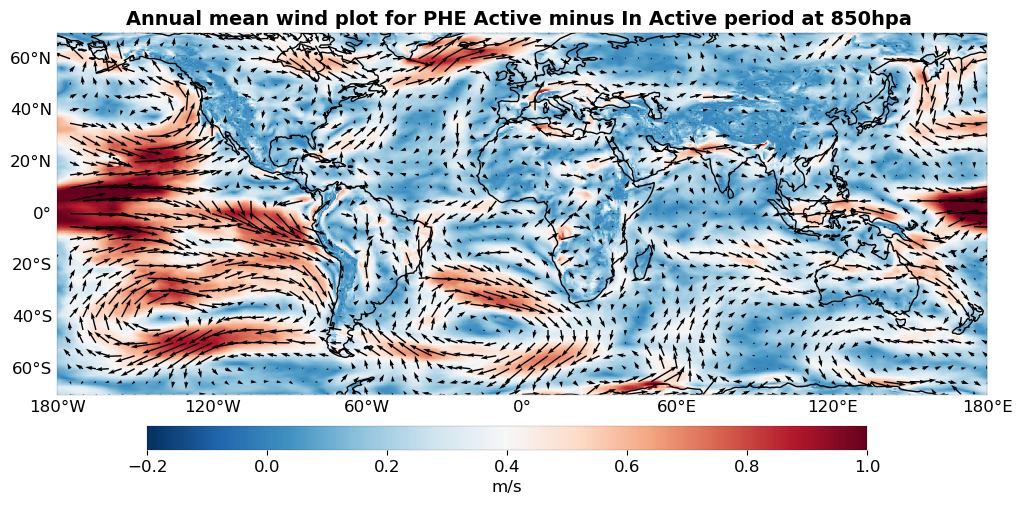

In [8]:
#Plot out the figures
fig=plt.figure(figsize=(12, 8), dpi=100)
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.1
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree())
speed_plot = plt.pcolormesh(wspd_son['longitude'], wspd_son['latitude'], wspd_son, cmap='RdBu_r',
               vmin=-0.2, vmax=1)
plt.quiver(X_son[::20, ::20], Y_son[::20, ::20], U_son[::20, ::20], V_son[::20, ::20], 
           transform=ccrs.PlateCarree(), color='k', scale=25, width=0.0015,)
#lakes_10m = cfeature.NaturalEarthFeature('physical','lakes','10m')
#ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
#ax.add_feature(lakes_10m, facecolor='none', edgecolor='k')
plt.xlim([-180, 180])
plt.ylim([-70, 70])
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.title('Annual mean wind plot for PHE Active minus In Active period at 850hpa ',fontsize=14, fontweight='bold')
colorbar_axes = plt.gcf().add_axes([0.2, 0.2, 0.6, 0.03])
plt.colorbar(speed_plot, colorbar_axes, label='m/s', orientation='horizontal')
#plt.text(0.08, 0.36, 'ERA5 (600 hPa)',fontsize=14,fontweight='bold', rotation='vertical',
#         transform=plt.gcf().transFigure)
# save output
plt.savefig('C:/ERSSTv5/Global_ERA5-Active-Inactive-wind.png')
plt.show()

### God Provides